# Visualización de Datos tomados de MongoDB

Visualización de [datos del premio Nobel](https://github.com/Kyrand/dataviz-with-python-and-js/blob/master/Ch11_Exploring_Data_with_Pandas.ipynb)

In [14]:
%matplotlib inline

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pymongo
from pymongo import MongoClient

In [16]:
connection = MongoClient("ds050879.mlab.com", 50879)
db = connection["ibocerra"]
db.authenticate("dylan123", "dylan123")

True

In [17]:
nobels = db.nobels

In [18]:
datos = nobels.find()
df = pd.DataFrame(list(datos))

In [19]:
by_gender = df.groupby('gender')

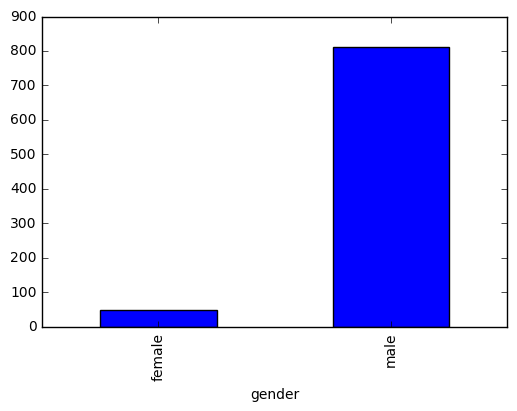

In [20]:
by_gender.size().plot(kind='bar')

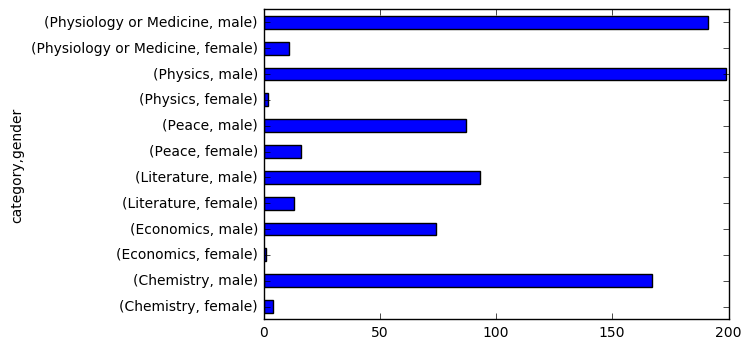

In [21]:
by_cat_gen = df.groupby(['category', 'gender'])
by_cat_gen.size().plot(kind='barh')

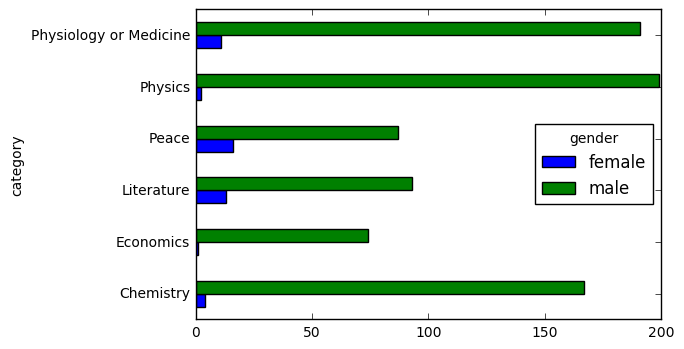

In [22]:
by_cat_gen.size().unstack().plot(kind='barh')

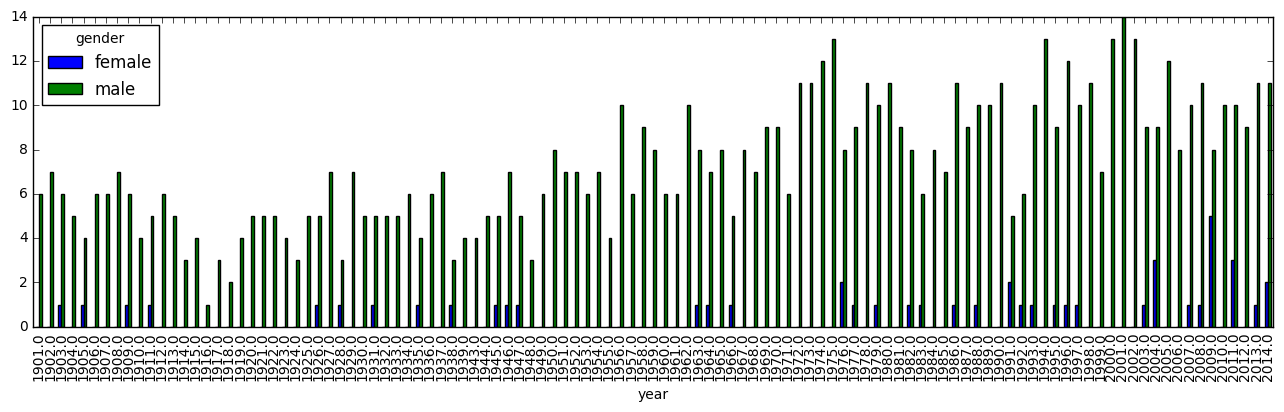

In [23]:
by_year_gender = df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(16,4))

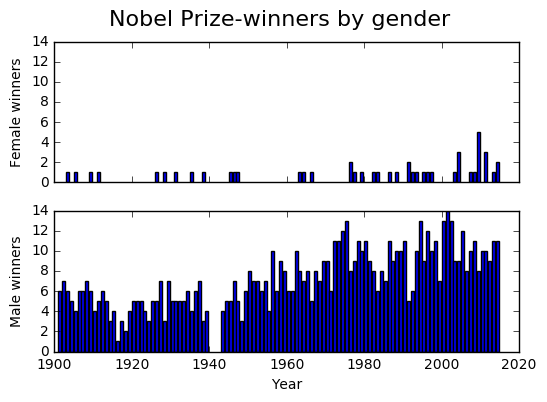

In [26]:
new_index = pd.Index(np.arange(1901, 2015), name='year')
by_year_gender = df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)
fig, axes = plt.subplots(nrows=2, ncols=1,
sharex=True, sharey=True)
ax_f = axes[0]
ax_m = axes[1]
fig.suptitle('Nobel Prize-winners by gender', fontsize=16)
ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel('Female winners')
ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel('Male winners')
ax_m.set_xlabel('Year')

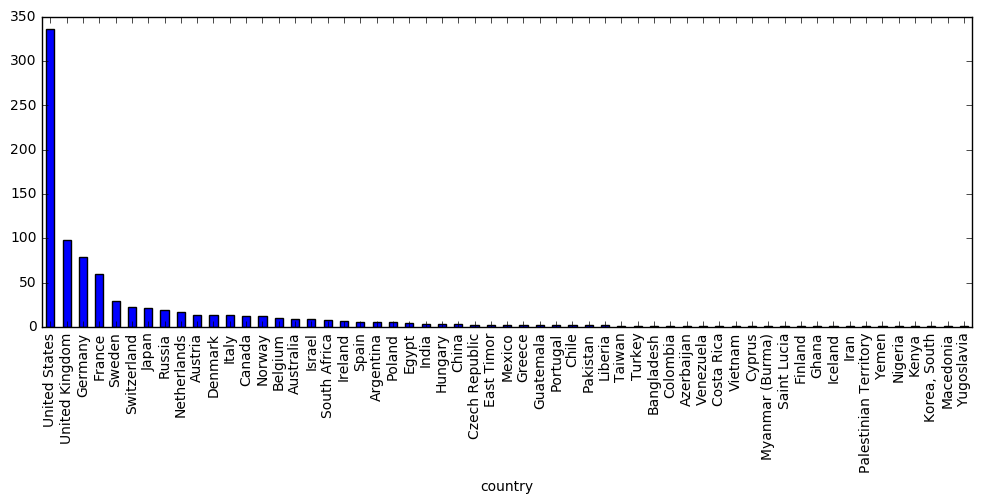

In [27]:
df.groupby('country').size().sort_values(ascending=False)\
.plot(kind='bar', figsize=(12,4))